# Tutorial 10: Validation

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly-static")

Split our dataset into a train and validation set. We will use the validation set to check the performance of our model. The size of the validation set is 20% of our total dataset. Adapt the size with the parameter `valid_p` in `split_df`.

In [2]:
df_train, df_val = m.split_df(df, valid_p=0.2)

print("Dataset size:", len(df))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 1462
Train dataset size: 1170
Validation dataset size: 292


Validation is performed by passing the validation set to the fit method during training. The resulting metrics show the performance of the model compared to our validation set.

In [3]:
metrics = m.fit(df_train, validation_df=df_val, progress=None)
metrics

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,221.477264,229.502106,3.257769,0.0,0,145.751770,158.595886,1.568946,0.0
1,215.284729,223.373337,3.152701,0.0,1,141.798370,154.633118,1.517224,0.0
2,207.430786,215.713898,3.019444,0.0,2,137.144974,150.350739,1.454332,0.0
3,196.983246,205.516113,2.842184,0.0,3,131.278915,144.710831,1.377219,0.0
4,183.329987,192.085739,2.610561,0.0,4,123.464066,137.107346,1.271376,0.0
...,...,...,...,...,...,...,...,...,...
180,6.745960,8.581630,0.010600,0.0,180,4.606429,6.224144,0.004244,0.0
181,6.744328,8.574614,0.010583,0.0,181,4.586703,6.185854,0.004216,0.0
182,6.740693,8.568055,0.010567,0.0,182,4.587186,6.154813,0.004217,0.0
183,6.739682,8.566989,0.010564,0.0,183,4.597005,6.232765,0.004256,0.0


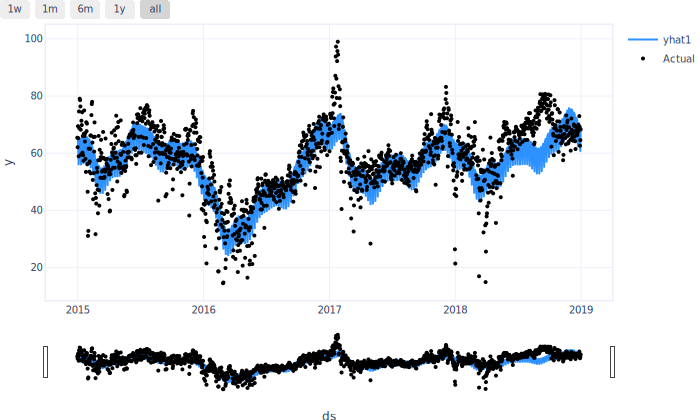

In [4]:
forecast = m.predict(df)
m.plot(forecast)

For advanced validation and testing methods, check out the *Test and CrossValidate* tutorial in the *How to guides* section.
